# Exercise 2-1: Logistic Regression

In this exercise, we will implement logistic regression and apply it to two different datasets.

## Load Data

In ex2data1.txt, the first two columns contains the exam scores and the third column contains the label.

In [3]:
import numpy as np


data = np.loadtxt(open("ex2data1.txt", "r"), delimiter=",")
X = data[:, 0:2]
y = data[:, 2]

## Part 1: Plotting

The plot_data() plots the given data points X and y.

In [5]:
import matplotlib.pyplot as plt


def plot_data(X, y):
    """
    Plots the data points X and y.

    Parameters
    ----------
    X : array-like, shape (n_samples, 2)
        Data on x axis.
    y : array-like, shape (n_samples,)
        Data on y axis.
    """
    pos = np.argwhere(y == 1)
    neg = np.argwhere(y == 0)

    plt.plot(X[pos, 0], X[pos, 1], linestyle='', marker='+', color='k')
    plt.plot(X[neg, 0], X[neg, 1], linestyle='', marker='o', color='y')

Plot the dataset:

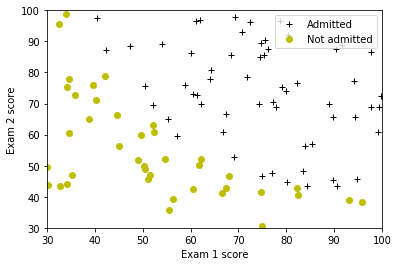

In [6]:
plt.figure()
plot_data(X, y)
# Labels and Legend
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.xlim([30, 100])
plt.ylim([30, 100])
plt.legend(['Admitted', 'Not admitted'], loc='upper right', numpoints=1)
plt.show()

## Part 2: Compute Cost and Gradient

Initialize training parameters as follows:

In [8]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape
# Add intercept term to x and X_test
X = np.hstack((np.ones((m, 1)), X))
# Initialize fitting parameters
theta = np.zeros(n + 1)  # Initialize fitting parameters

To compute the cost, we need to implement the sigmoid function first.

In [9]:
def sigmoid(z):
    """
    Compute sigmoid function.

    Parameters
    ----------
    z : array-like
        Variable for sigmoid function.

    Returns
    -------
    ndarray
        The sigmoid of each value of z.
    """
    g = 1 / (1 + np.exp(-z))
    return g

The cost_function() computes the cost and gradient for logistic regression.

In [10]:
def cost_function(theta, X, y):
    """
    Compute cost and gradient for logistic regression.

    Parameters
    ----------
    theta : ndarray, shape (n_features,)
        Linear regression parameter.
    X : ndarray, shape (n_samples, n_features)
        Training data, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels.

    Returns
    -------
    J : numpy.float64
        The cost of using theta as the parameter for linear regression to fit the data points in x and y.
    grad: ndarray, shape (n_features,)
        The gradient of the cost w.r.t. the parameters.
    """
    m, n = X.shape
    x_dot_theta = X.dot(theta)

    J = 1.0 / m * (-y.T.dot(np.log(sigmoid(x_dot_theta))) - (1 - y).T.dot(np.log(1 - sigmoid(x_dot_theta))))

    grad = 1.0 / m * (sigmoid(x_dot_theta) - y).T.dot(X)

    return J, grad

Test the cost_function() on initial values:

In [11]:
cost, grad = cost_function(theta, X, y)

print('Cost at initial theta (zeros):', cost)
print('Gradient at initial theta (zeros):', grad)

Cost at initial theta (zeros): 0.6931471805599452
Gradient at initial theta (zeros): [ -0.1        -12.00921659 -11.26284221]


## Part 3: Optimizing using fmin_tnc()

Train the model with fin_tnc():

Plot the boundary:

In [18]:
import scipy.optimize as opt


theta, nfeval, rc = opt.fmin_tnc(func=cost_function, x0=theta, args=(X, y))

cost, _ = cost_function(theta, X, y)
print('Cost at theta found by fminunc:', cost)
print('theta:', theta)

Cost at theta found by fminunc: 0.203497701589475
theta: [-25.16131851   0.20623159   0.20147148]


Now define map_feature()

In [24]:
def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features. Inputs X1, X2 must be the same size.
    Parameters
    ----------
    X1 : ndarray, shape (n_samples,)
        Input feature.
    X2 : ndarray, shape (n_samples,)
        Input feature.
    Returns
    -------
    Out : ndarray, shape (n_samples, 28)
        A new feature array with more features, comprising of X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    """
    degree = 6
    Out = np.ones(len(X1))

    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            tmp = np.power(X1, i - j) * np.power(X2, j)
            Out = np.vstack((Out, tmp))
    return Out.T

Now define plot_decision_boundary method

In [25]:
def plot_decision_boundary(theta, X, y):
    """
    Plots the data points X and y into a new figure with the decision boundary defined by theta.
    Parameters
    ----------
    theta : ndarray, shape (n_features,)
        Linear regression parameter.
    X : ndarray, shape (n_samples, n_features)
        Training data, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels.
    """
    if X.shape[1] <= 3:
        plot_X = np.array([np.amin(X[:, 1]) - 2, np.amax(X[:, 1]) + 2])
        plot_y = -1.0 / theta[2] * (theta[1] * plot_X + theta[0])
        plt.plot(plot_X, plot_y)
    else:
        u = np.linspace(-1, 1.5, 50)
        # u.resize((len(u), 1))
        v = np.linspace(-1, 1.5, 50)
        # v.resize((len(v), 1))
        z = np.zeros((len(u), len(v)))
        for i in range(len(u)):
            for j in range(len(v)):
                z[i, j] = map_feature(u[i:i+1], v[j:j+1]).dot(theta)
        z = z.T
        u, v = np.meshgrid(u, v)
        cs = plt.contour(u, v, z, levels=[0])
        fmt = {}
        strs = ['Decision boundary']
        for l, s in zip(cs.levels, strs):
            fmt[l] = s

        plt.clabel(cs, cs.levels[::2], inline=True, fmt=fmt, fontsize=10)

Plot the boundary:

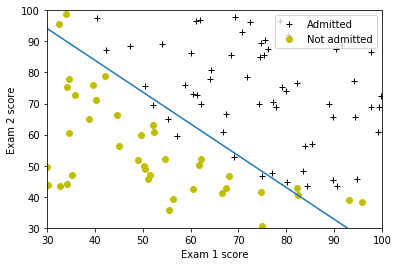

In [26]:
plt.figure()
plot_data(X[:, 1:], y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.xlim([30, 100])
plt.ylim([30, 100])
plt.legend(['Admitted', 'Not admitted'], loc='upper right', numpoints=1)

# Plot Boundary
plot_decision_boundary(theta, X, y)
plt.show()

## Part 4: Predict and Accuracies

Predict probability for a student with score 45 on exam 1 and score 85 on exam 2:

In [28]:
prob = sigmoid(np.dot(np.array([1, 45, 85]), theta))
print('For a student with scores 45 and 85, we predict an admission probability of', prob)

For a student with scores 45 and 85, we predict an admission probability of 0.7762906214285727


The predict() predicts the input data with learned logistic regression parameters.

In [29]:
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters theta.

    Parameters
    ----------
    theta : ndarray, shape (n_features,)
        Linear regression parameter.
    X : ndarray, shape (n_samples, n_features)
        Training data, where n_samples is the number of samples and n_features is the number of features.

    Returns
    -------
    ndarray, shape (n_samples,)
        The predictions for X using a threshold at 0.5.
    """
    p = sigmoid(X.dot(theta)) >= 0.5
    return p.astype(int)

Compute accuracy on our training set:

In [30]:
p = predict(theta, X)
print('Train Accuracy:', np.mean(p == y) * 100)

Train Accuracy: 89.0
